fTrue =  8.035078391532835e-07


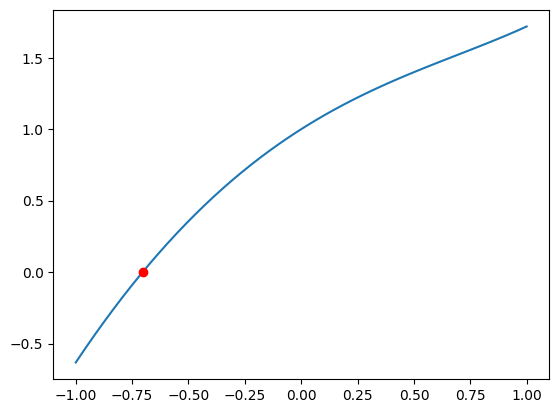

In [3]:
"""1 Calcolo zero funzione
Exercise 1.1. Scrivere una function che implementi il metodo delle approssimazioni 
    successive per il calcolo dello zero di una funzione f (x) prendendo come input una 
    delle seguenti funzioni per l’aggiornamento:
     g(x) = x − f (x)ex/2
     g(x) = x − f (x)e−x/2
Testare il la function per trovare lo zero della funzione f (x) = ex − x2 , la cui 
soluzione è x∗ = −0.703467.
Scrivere una function che implementi il metodo di Newton, ricordando che il metodo di 
Newton può essere considerato come un caso particolare del metodo delle approssimazioni 
successive dove la funzione di aggiornamento è g(x) = x − f (x)/f ′ (x).
    1. Disegnare il grafico della funzione f nell’intervallo I = [−1, 1] e verificare che 
        x∗ sia lo zero di f in [−1, 1]."""
import numpy as np
import matplotlib.pyplot as plt

# Function approssimazioni successive
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i=0
  err=np.zeros(maxit+1, dtype=np.float64)
  err[0]=tolx+1
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  vecErrore[0] = np.abs(xTrue - x0)
  x=x0

  while (i < maxit and (np.abs(f(x)) > tolf or np.abs(err[i]) > tolx)): # scarto assoluto tra iterati
    x_new= g(x)
    err[i+1]= np.abs(x_new - x)
    vecErrore[i+1]= np.abs(xTrue - x_new)
    i=i+1
    x=x_new
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore) 

def newton(f, df, tolf, tolx, maxit, xTrue, x0=0): #tolf = tolleranza f, maxit =max iteraz
    g = lambda x: x -f(x)/df(x) #lambda crea la funzione
    (x, i, err, vecErrore) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    return (x, i, err, vecErrore)

f = lambda x: np.exp(x)-x**2
df = lambda x: np.exp(x)-2*x
g1 = lambda x: x-f(x)*np.exp(x/2)
g2 = lambda x: x-f(x)*np.exp(-x/2)

xTrue = -0.703467
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(-1, 1)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

Metodo approssimazioni successive g1 
 x = -0.7034674225096886 
 iter_new= 23
Metodo approssimazioni successive g2 
 x = -0.48775858993453886 
 iter_new= 100
Metodo Newton 
 x = -0.7034674224983917 
 iter_new= 6


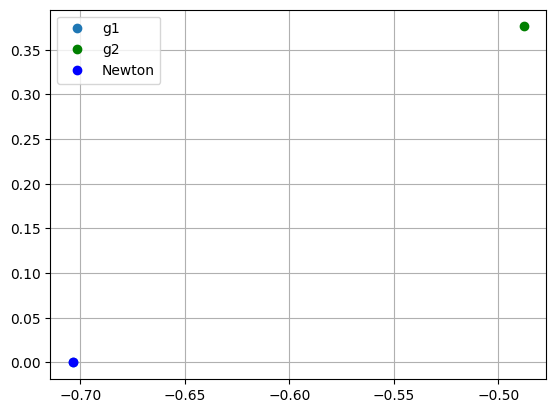

In [5]:
""" 2. Calcolare lo zero della funzione utilizzando i metodi precedentemente descritti.
    3. Confrontare l’accuratezza delle soluzioni trovate e il numero di iterazioni 
        effettuate dai solutori.
"""
tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)

plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_g2, iter_g2, err_g2, vecErrore_g2]=succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =',sol_g2,'\n iter_new=', iter_g2)

plt.plot(sol_g2,f(sol_g2), 'og', label='g2')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)

plt.plot(sol_newton,f(sol_newton), 'ob', label='Newton')
plt.legend()
plt.grid()
plt.show()

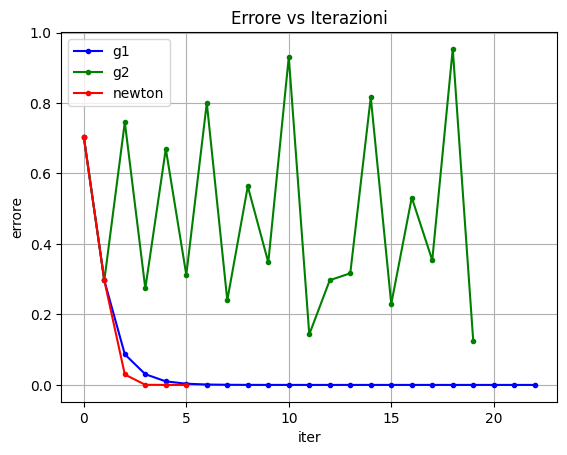

In [6]:
"""4. Modificare le due funzioni in modo da calcolare l’errore ∥xk − x∗ ∥2 ad ogni 
      iterazione k-esima e graficare.
"""

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# g2
plt.plot(vecErrore_g2[:20], '.-', color='green')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "g2", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

fTrue =  1.4366462846027162e-06
Metodo approssimazioni successive g1 
 x = 0.5368385515657959 
 iter_new= 11
Metodo Newton 
 x = 0.5368385515667755 
 iter_new= 6


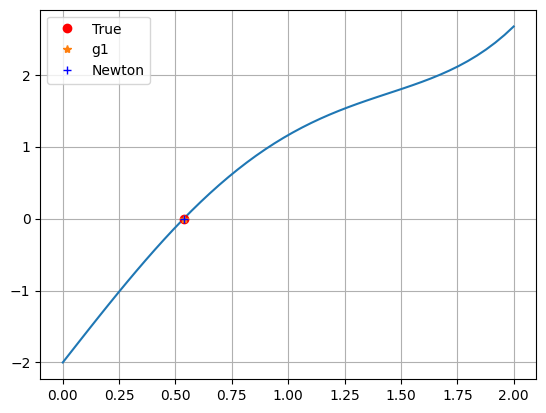

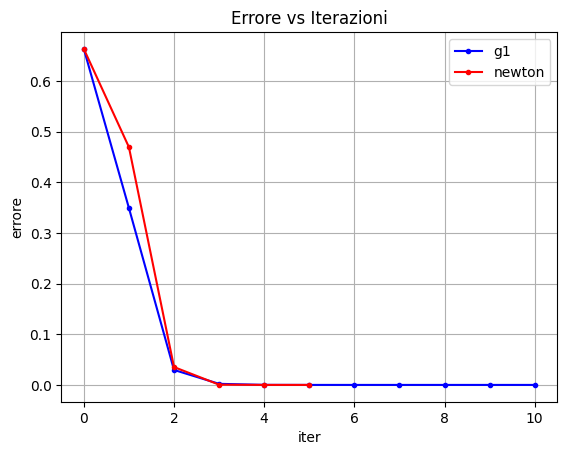

In [13]:
"""Exercise 1.2. Applicare il metodo delle approssimazioni successive e il metodo di Newton a:
     f (x) = x3 + 4xcos(x) − 2 nell’intervallo [0, 2], g(x) = 4cos(x), con x∗ ≈ 0.5369
     f (x) = x − x1/3 − 2 nell’intervallo [3, 5], g(x) = x1/3 + 2, con x∗ ≈ 3.5213
Suggerimento per l’analisi dei risultati. Confronta l’accuratezza e il numero di iterazioni dei metodi al variare
del punto iniziale e dei parametri per i criteri di arresto. Spiegare il comportamento dei metodi nei diversi
casi
"""
####funzione n°1:
f = lambda x: x**3+4*x*np.cos(x)-2
df = lambda x: 3*x**2 + 4*np.cos(x)-4*x*np.sin(x)
g1 = lambda x: (2-x**3)/(4*np.cos(x))

xTrue = 0.536839
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(0, 2)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 1.2 #limite altrimenti overflow

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)

plt.plot(sol_g1,f(sol_g1), '*', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

fTrue =  -6.822785407889498e-05
Metodo approssimazioni successive g1 
 x = 3.521379706798214 
 iter_new= 13
Metodo Newton 
 x = 3.521379706804568 
 iter_new= 4


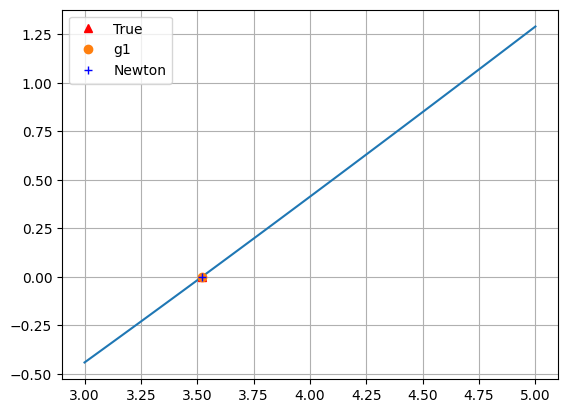

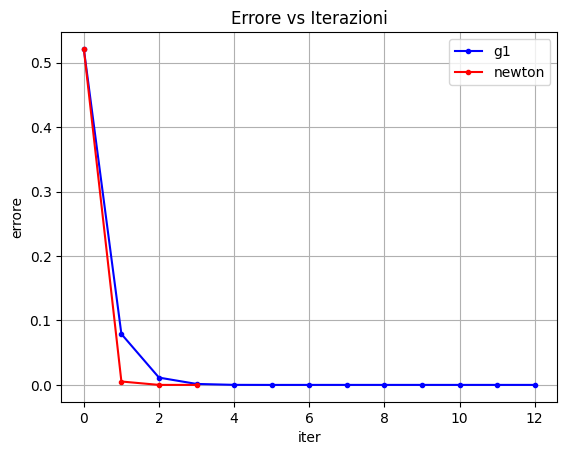

In [14]:
####funzione n°2:
f = lambda x: x-x**(1/3)-2
df = lambda x: 1 - 1/3*x**(-2/3)
g1 = lambda x: x**(1/3)+2

xTrue = 3.5213
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(3, 5)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, '^r', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 3

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)

plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()